In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp "/content/drive/My Drive/BaseDeDatos/datos_completosRNN.csv" "/content/"
!cp "/content/drive/My Drive/Tmin_2000-2022_series.csv" "/content/"
!cp "/content/drive/My Drive/TMax_2000-2022_series.csv" "/content/"
!cp "/content/drive/My Drive/Prec_2000-2022_series.csv" "/content/"

In [4]:
data = pd.read_csv("datos_completosRNN.csv")
Prec = pd.read_csv("Prec_2000-2022_series.csv")
Tmin = pd.read_csv("Tmin_2000-2022_series.csv")
TMax = pd.read_csv("TMax_2000-2022_series.csv")

In [5]:
Prec

,Date,1,2,3,4
0,2000-01-01,0.0,0.0,5.5,0.0
1,2000-01-02,0.1,0.0,2.2,0.1
2,2000-01-03,0.0,0.0,7.8,0.0
3,2000-01-04,8.6,17.4,6.4,8.6
4,2000-01-05,2.7,4.0,9.0,2.7
...,...,...,...,...,...
8396,2022-12-27,0.0,0.0,2.1,0.0
8397,2022-12-28,6.5,5.2,16.9,6.5
8398,2022-12-29,0.0,0.0,42.6,0.0
8399,2022-12-30,0.1,0.0,0.6,0.1


In [6]:
df = data.copy()

In [7]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
# Establecer la columna de fecha como el índice
df.set_index('Fecha', inplace=True)
# Configurar una frecuencia diaria
df = df.asfreq('D')

Prec['Date'] = pd.to_datetime(Prec['Date'])
Prec.set_index('Date', inplace=True)
Prec = Prec.asfreq('D')

TMax['Date'] = pd.to_datetime(TMax['Date'])
TMax.set_index('Date', inplace=True)
TMax = TMax.asfreq('D')

Tmin['Date'] = pd.to_datetime(Tmin['Date'])
Tmin.set_index('Date', inplace=True)
Tmin = Tmin.asfreq('D')


In [8]:
df = df.merge(TMax[['4']], how='left', left_index=True, right_index=True)
df.drop(columns='Temperatura_Maxima', inplace=True)
df.rename(columns={'4': 'Temperatura_Maxima'}, inplace=True)

In [9]:
df = df.merge(Tmin[['4']], how='left', left_index=True, right_index=True)
df.drop(columns='Temperatura_Minima', inplace=True)
df.rename(columns={'4': 'Temperatura_Minima'}, inplace=True)

In [10]:
df = df.merge(Prec[['4']], how='left', left_index=True, right_index=True)
df.drop(columns='Precipitacion', inplace=True)
df.rename(columns={'4': 'Precipitacion'}, inplace=True)

In [11]:
df

,Humedad_Relativa_Minima,Humedad_Relativa_Media,Humedad_Relativa_Maxima,Direccion_de_Viento_Minima,Direccion_de_Viento_Maxima,Velocidad_de_Viento_Minima,Velocidad_de_Viento_Maxima,eTo,Temperatura_Maxima,Temperatura_Minima,Precipitacion
Fecha,,,,,,,,,,,
2000-01-01,42.0,58.0,87.0,0.000000,6.000000,0.000000,18.500000,5.750000,27.5,13.7,0.0
2000-01-02,28.0,45.0,67.0,0.000000,6.000000,0.000000,33.400000,6.500000,29.3,12.3,0.1
2000-01-03,41.0,52.0,60.0,0.000000,14.000000,0.000000,37.100000,5.590000,27.1,13.9,0.0
2000-01-04,36.0,51.0,67.0,0.000000,2.000000,0.000000,11.100000,6.220000,28.4,12.1,8.6
2000-01-05,40.0,58.0,89.0,0.000000,6.000000,0.000000,18.500000,5.510000,25.9,11.7,2.7
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,21.0,33.0,51.0,1.471528,9.251265,3.372669,16.324402,3.619068,31.8,13.0,0.0
2022-12-28,36.0,51.0,81.0,4.802479,9.251265,3.372679,16.324591,3.615566,27.1,12.2,6.5
2022-12-29,53.0,57.0,62.0,3.638818,9.251265,3.372688,16.324770,3.612043,27.3,17.0,0.0


In [12]:
# Suponiendo que deseas guardar el DataFrame en un archivo CSV llamado "datos_completosRNN.csv"
ruta_archivo = "/content/drive/My Drive/BaseDeDatos/datos_completosRNN+H.csv"

# Guardar el DataFrame en el archivo CSV
df.to_csv(ruta_archivo, index=True)

In [13]:
print(df.dtypes)

Humedad_Relativa_Minima       float64
Humedad_Relativa_Media        float64
Humedad_Relativa_Maxima       float64
Direccion_de_Viento_Minima    float64
Direccion_de_Viento_Maxima    float64
Velocidad_de_Viento_Minima    float64
Velocidad_de_Viento_Maxima    float64
eTo                           float64
Temperatura_Maxima            float64
Temperatura_Minima            float64
Precipitacion                 float64
dtype: object


In [14]:
df.isnull().sum()

Humedad_Relativa_Minima       0
Humedad_Relativa_Media        0
Humedad_Relativa_Maxima       0
Direccion_de_Viento_Minima    0
Direccion_de_Viento_Maxima    0
Velocidad_de_Viento_Minima    0
Velocidad_de_Viento_Maxima    0
eTo                           0
Temperatura_Maxima            0
Temperatura_Minima            0
Precipitacion                 0
dtype: int64

In [15]:
df.describe()

,Humedad_Relativa_Minima,Humedad_Relativa_Media,Humedad_Relativa_Maxima,Direccion_de_Viento_Minima,Direccion_de_Viento_Maxima,Velocidad_de_Viento_Minima,Velocidad_de_Viento_Maxima,eTo,Temperatura_Maxima,Temperatura_Minima,Precipitacion
count,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000,8401.000000
mean,33.601365,49.805619,72.964950,1.993315,8.691873,1.411323,14.774274,4.987981,27.559600,9.933675,1.253875
std,14.945068,14.424421,15.294329,4.178625,4.727873,2.756693,9.422205,0.990851,2.870418,3.631625,4.183210
min,0.000000,9.000000,14.000000,-1.157168,0.000000,0.000000,0.000000,1.420000,14.600000,-2.100000,0.000000
25%,23.000000,40.000000,63.000000,0.000000,5.000000,0.000000,9.300000,4.200000,26.000000,7.000000,0.000000
50%,32.000000,49.000000,75.000000,0.000000,10.000000,0.000000,13.559640,4.910000,27.800000,10.800000,0.000000
75%,42.000000,59.000000,85.000000,0.000000,12.000000,0.000000,18.500000,5.720000,29.400000,12.900000,0.100000
max,96.000000,97.000000,100.000000,16.000000,16.000000,24.000000,91.000000,8.090000,38.800000,18.100000,76.200000


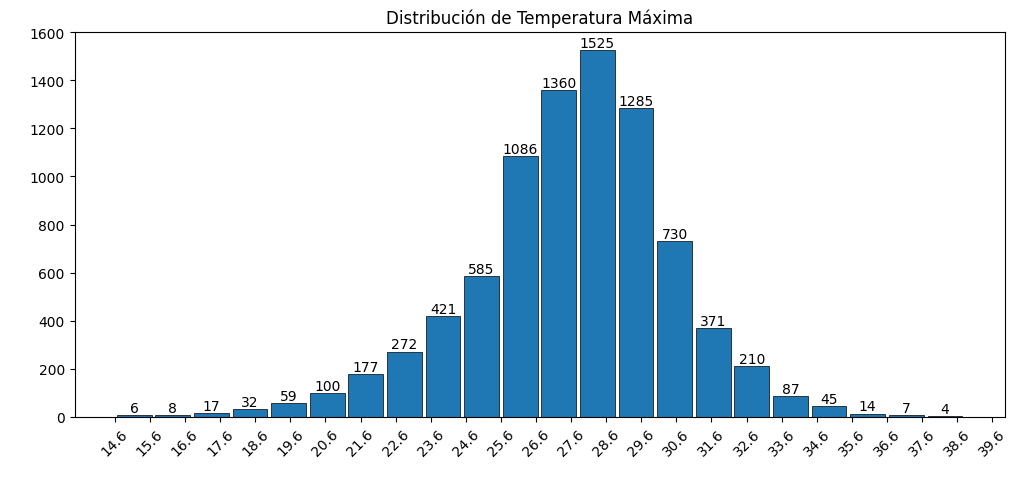

In [16]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Temperatura_Maxima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=22, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de Temperatura Máxima')

# Establecer divisiones en el eje x de uno en uno
plt.xticks(np.arange(start=df['Temperatura_Maxima'].min(), stop=df['Temperatura_Maxima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

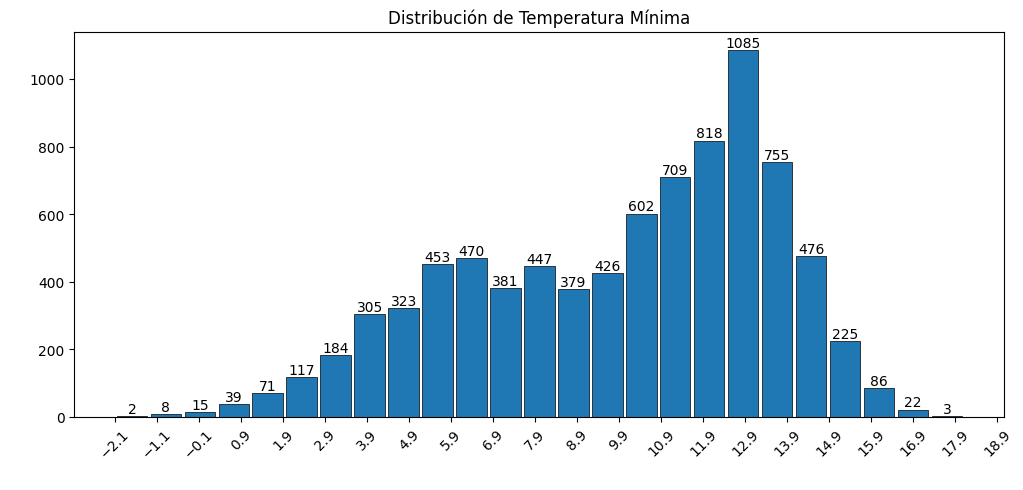

In [17]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Temperatura_Minima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=25, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de Temperatura Mínima')

# Establecer divisiones en el eje x de uno en uno
plt.xticks(np.arange(start=df['Temperatura_Minima'].min(), stop=df['Temperatura_Minima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

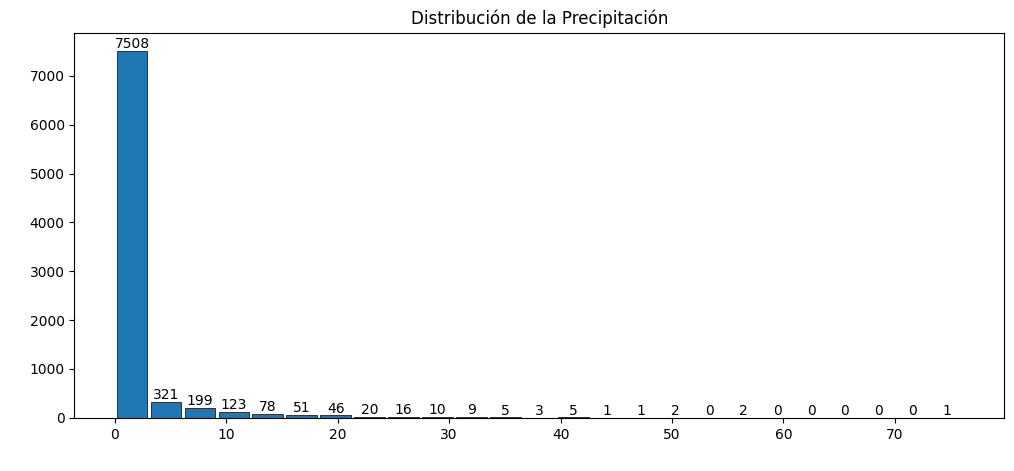

In [18]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Precipitacion'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=25, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Precipitación')

# Establecer divisiones en el eje x de uno en uno
#plt.xticks(np.arange(start=df['Precipitacion'].min(), stop=df['Precipitacion'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

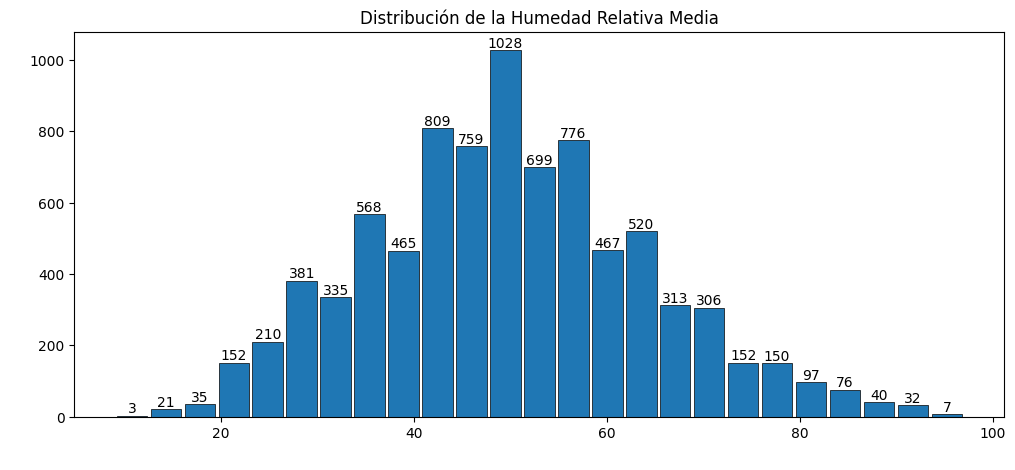

In [19]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Humedad_Relativa_Media'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=25, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Humedad Relativa Media')

# Establecer divisiones en el eje x de uno en uno
#plt.xticks(np.arange(start=df['Humedad_Relativa_Media'].min(), stop=df['Humedad_Relativa_Media'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

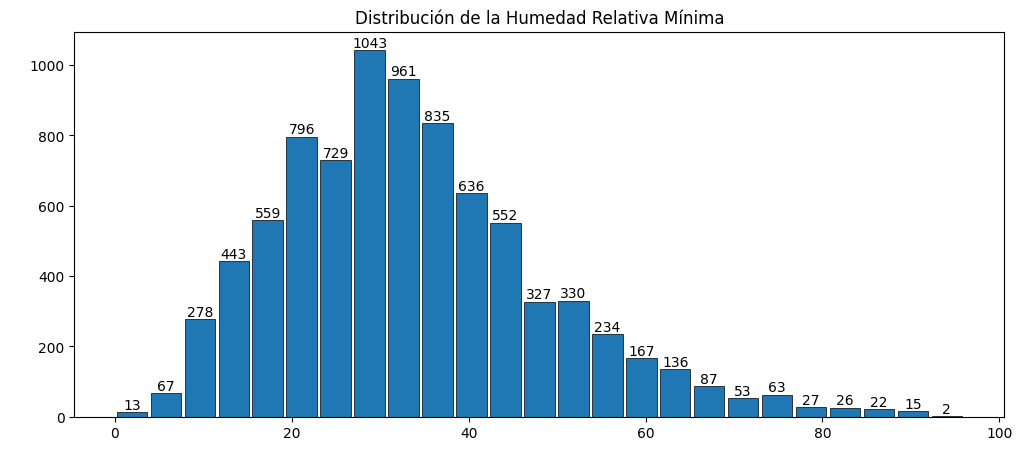

In [20]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Humedad_Relativa_Minima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=25, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Humedad Relativa Mínima')

# Establecer divisiones en el eje x de uno en uno
#plt.xticks(np.arange(start=df['Humedad_Relativa_Minima'].min(), stop=df['Humedad_Relativa_Minima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

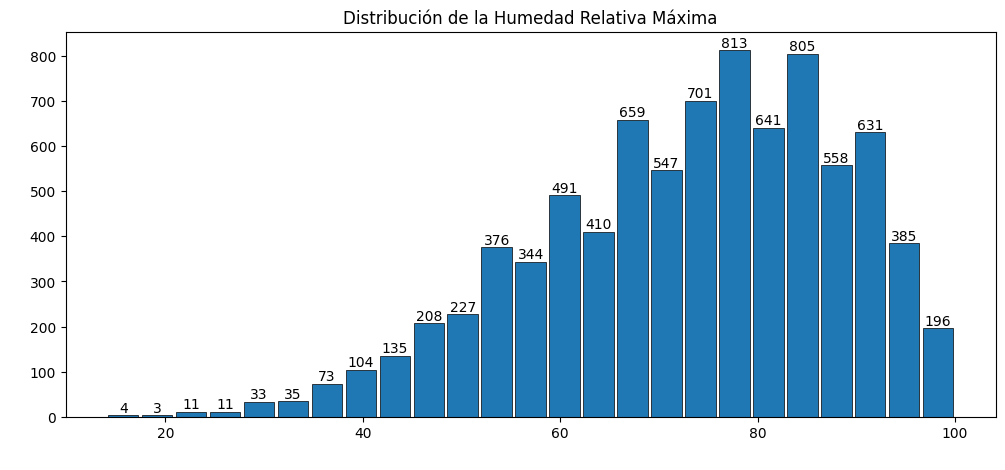

In [21]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Humedad_Relativa_Maxima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=25, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Humedad Relativa Máxima')

# Establecer divisiones en el eje x de uno en uno
#plt.xticks(np.arange(start=df['Humedad_Relativa_Maxima'].min(), stop=df['Humedad_Relativa_Maxima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

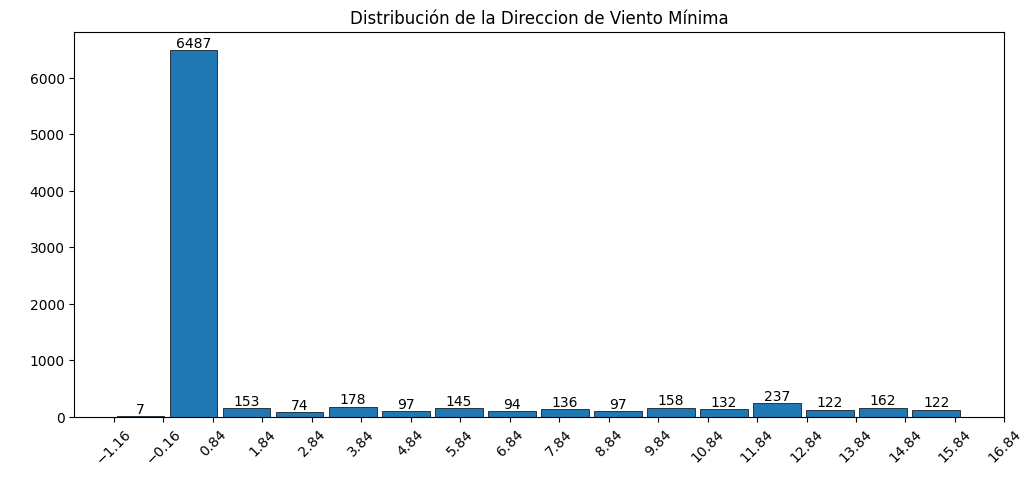

In [22]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Direccion_de_Viento_Minima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=16, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Direccion de Viento Mínima')

# Establecer divisiones en el eje x de uno en uno
plt.xticks(np.arange(start=df['Direccion_de_Viento_Minima'].min(), stop=df['Direccion_de_Viento_Minima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

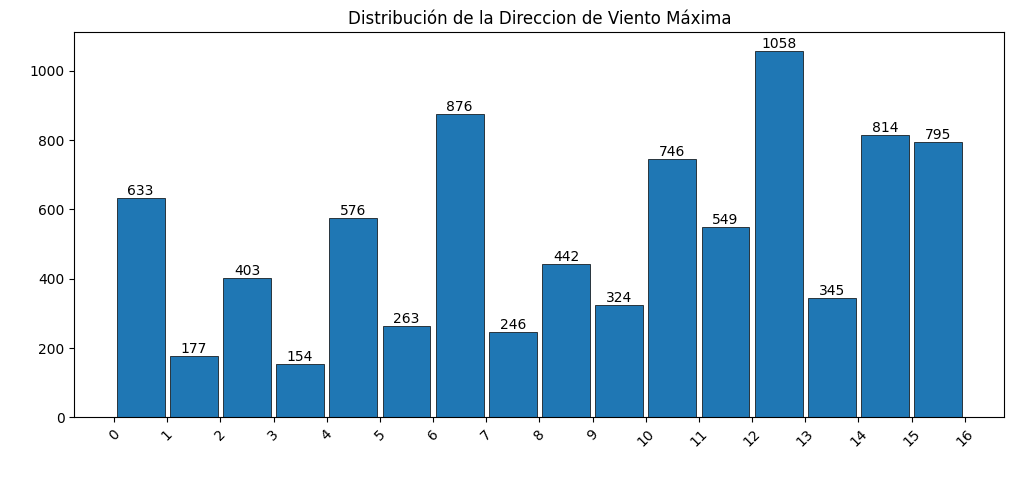

In [23]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Direccion_de_Viento_Maxima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=16, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Direccion de Viento Máxima')

# Establecer divisiones en el eje x de uno en uno
plt.xticks(np.arange(start=df['Direccion_de_Viento_Maxima'].min(), stop=df['Direccion_de_Viento_Maxima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

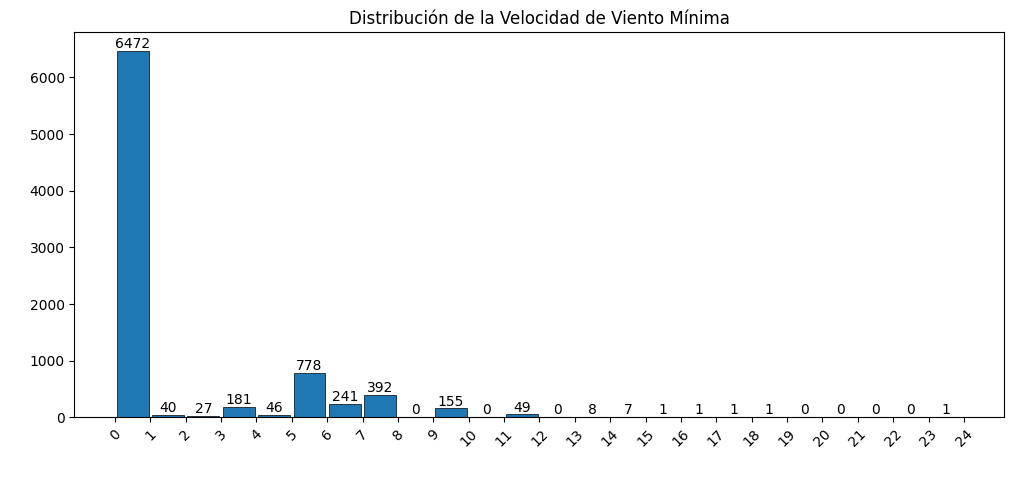

In [24]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Velocidad_de_Viento_Minima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=24, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Velocidad de Viento Mínima')

# Establecer divisiones en el eje x de uno en uno
plt.xticks(np.arange(start=df['Velocidad_de_Viento_Minima'].min(), stop=df['Velocidad_de_Viento_Minima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

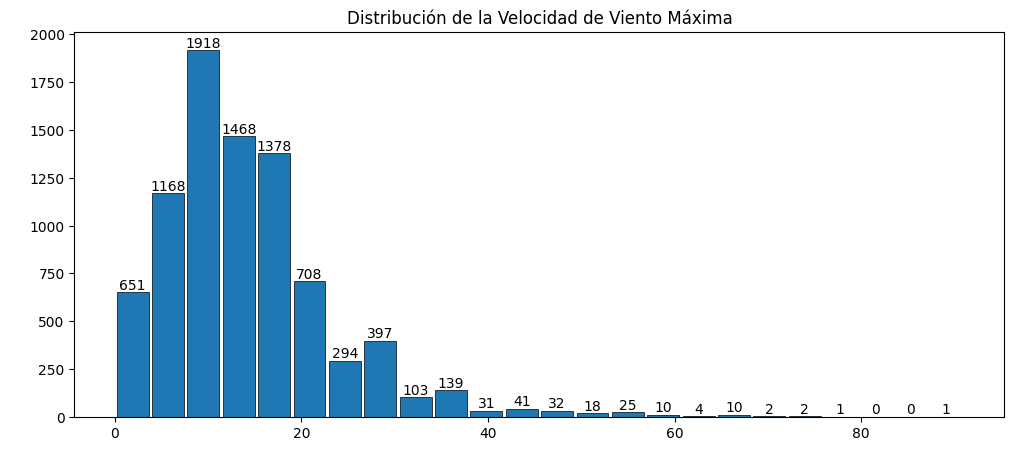

In [25]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['Velocidad_de_Viento_Maxima'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=24, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Velocidad de Viento Máxima')

# Establecer divisiones en el eje x de uno en uno
#plt.xticks(np.arange(start=df['Velocidad_de_Viento_Maxima'].min(), stop=df['Velocidad_de_Viento_Maxima'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

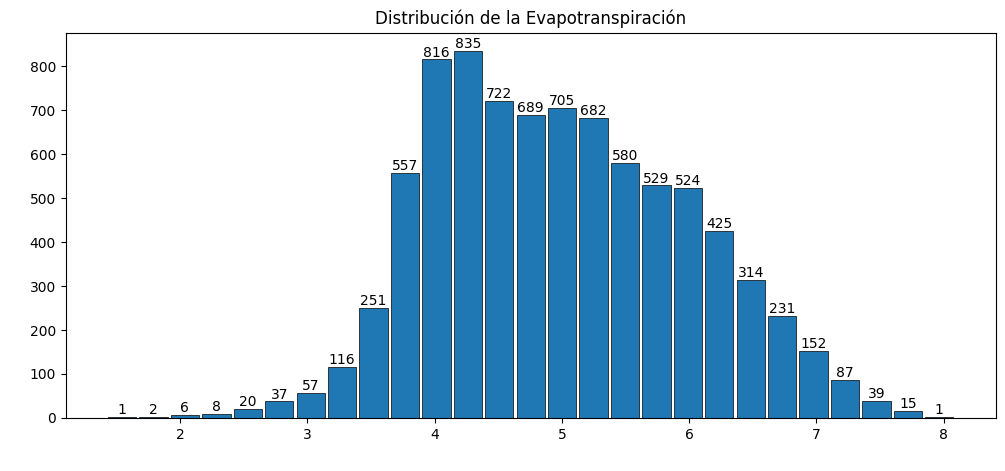

In [26]:
# Configurar histograma con ajustes personalizados
plt.figure(figsize=(12, 5))
df['eTo'].plot(kind='hist', grid=False, edgecolor='black', linewidth=0.5, bins=27, rwidth=0.9)
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('Distribución de la Evapotranspiración')

# Establecer divisiones en el eje x de uno en uno
#plt.xticks(np.arange(start=df['eTo'].min(), stop=df['eTo'].max()+1), rotation=45)

# Agregar etiquetas con el valor de cada columna
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()

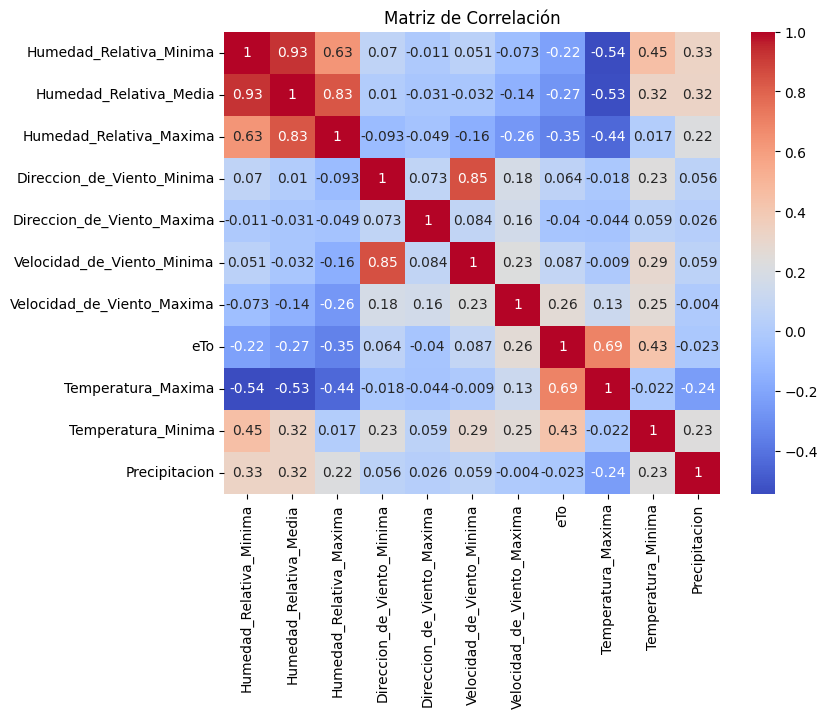

In [27]:
# Obtener la matriz de correlación
correlation_matrix = df.corr()

# Redondear los valores a tres decimales
correlation_matrix = correlation_matrix.round(3)

# Configurar el gráfico del mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.title('Matriz de Correlación')
plt.show()

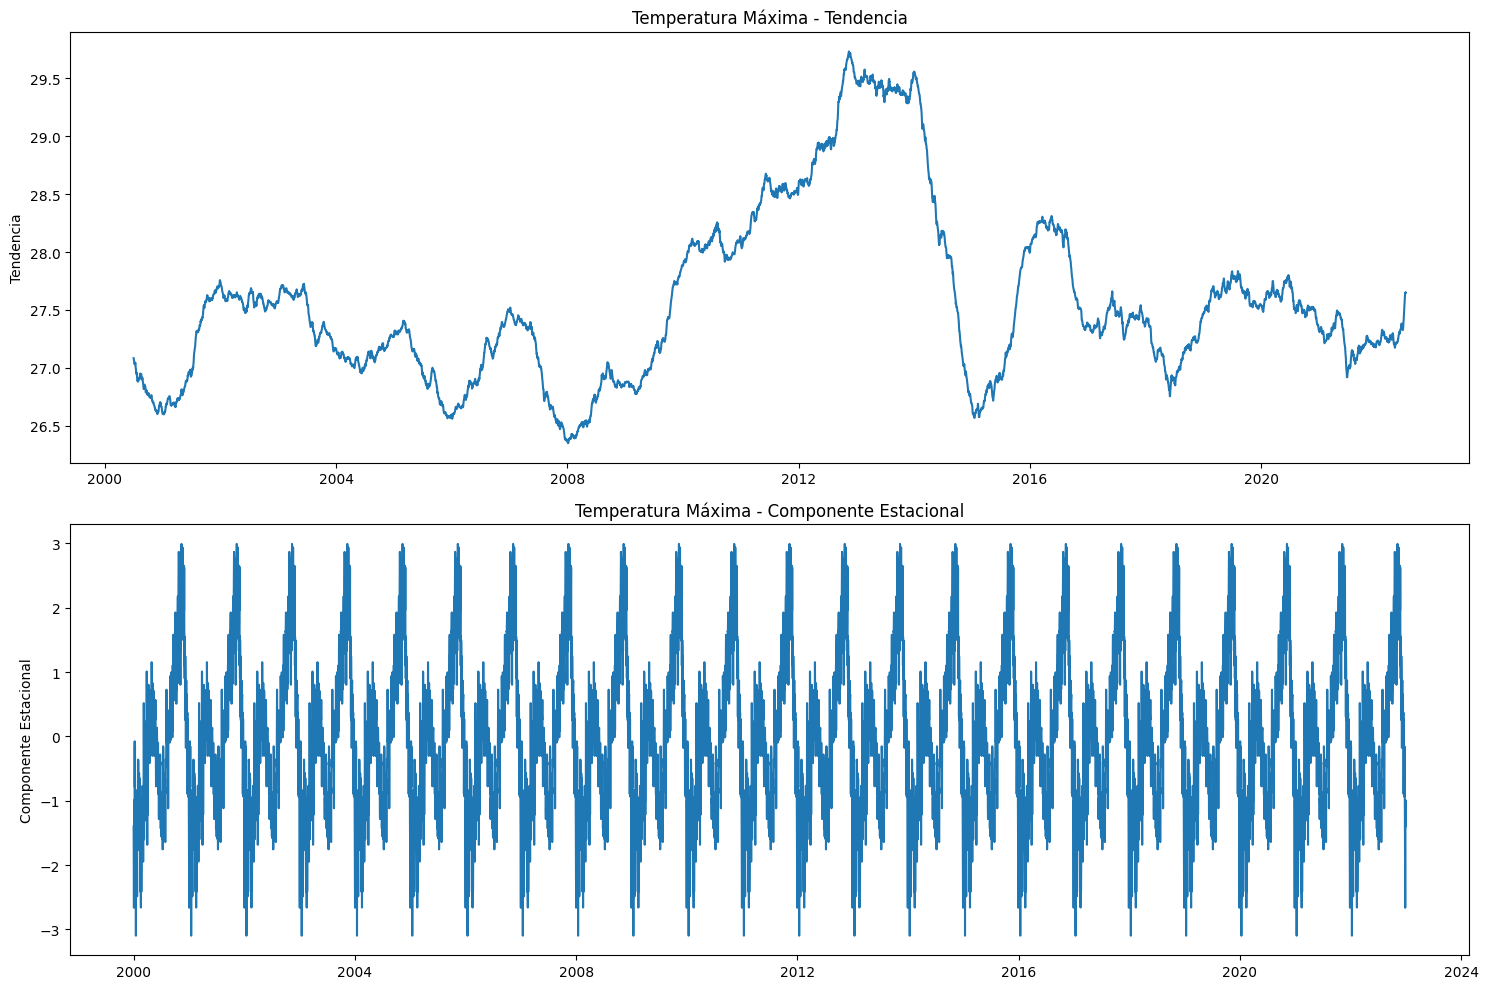

In [28]:
res = sm.tsa.seasonal_decompose(df['Temperatura_Maxima'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Temperatura Máxima - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Temperatura Máxima - Componente Estacional')

plt.tight_layout()
plt.show()

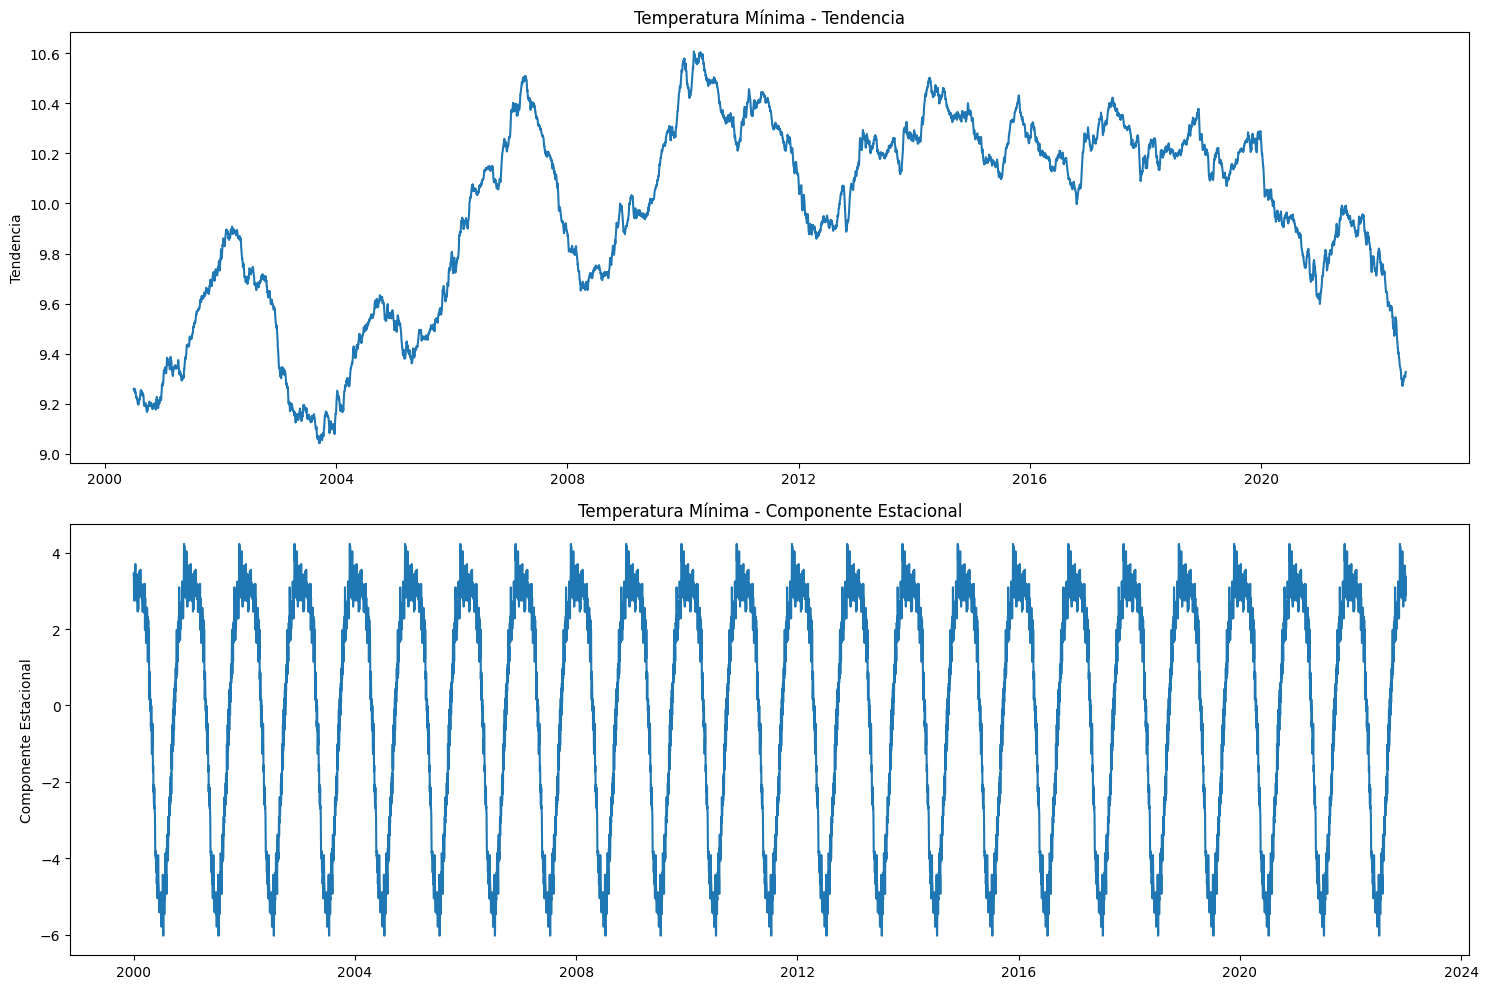

In [29]:
res = sm.tsa.seasonal_decompose(df['Temperatura_Minima'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Temperatura Mínima - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Temperatura Mínima - Componente Estacional')

plt.tight_layout()
plt.show()

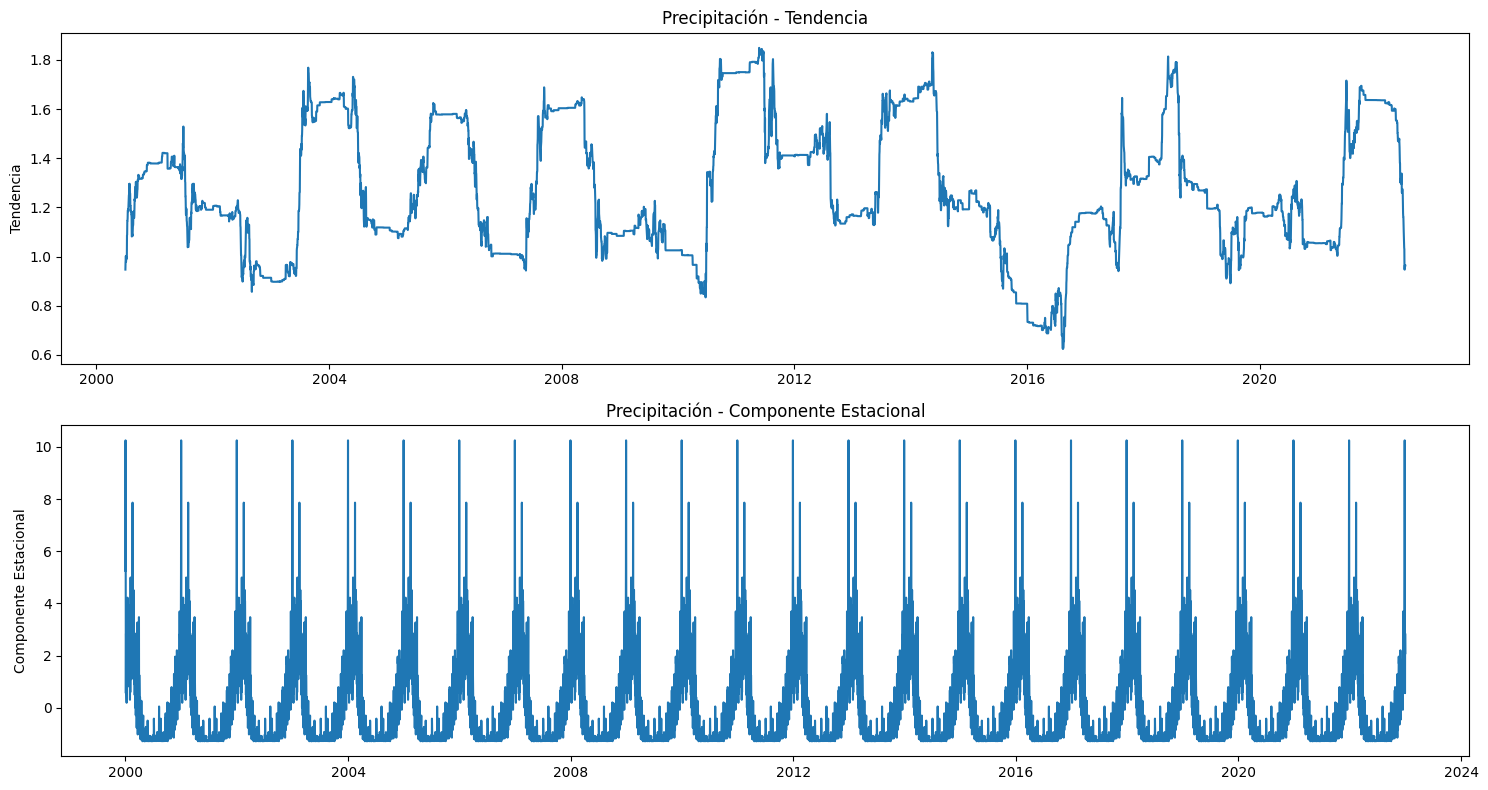

In [30]:
res = sm.tsa.seasonal_decompose(df['Precipitacion'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Precipitación - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Precipitación - Componente Estacional')

plt.tight_layout()
plt.show()

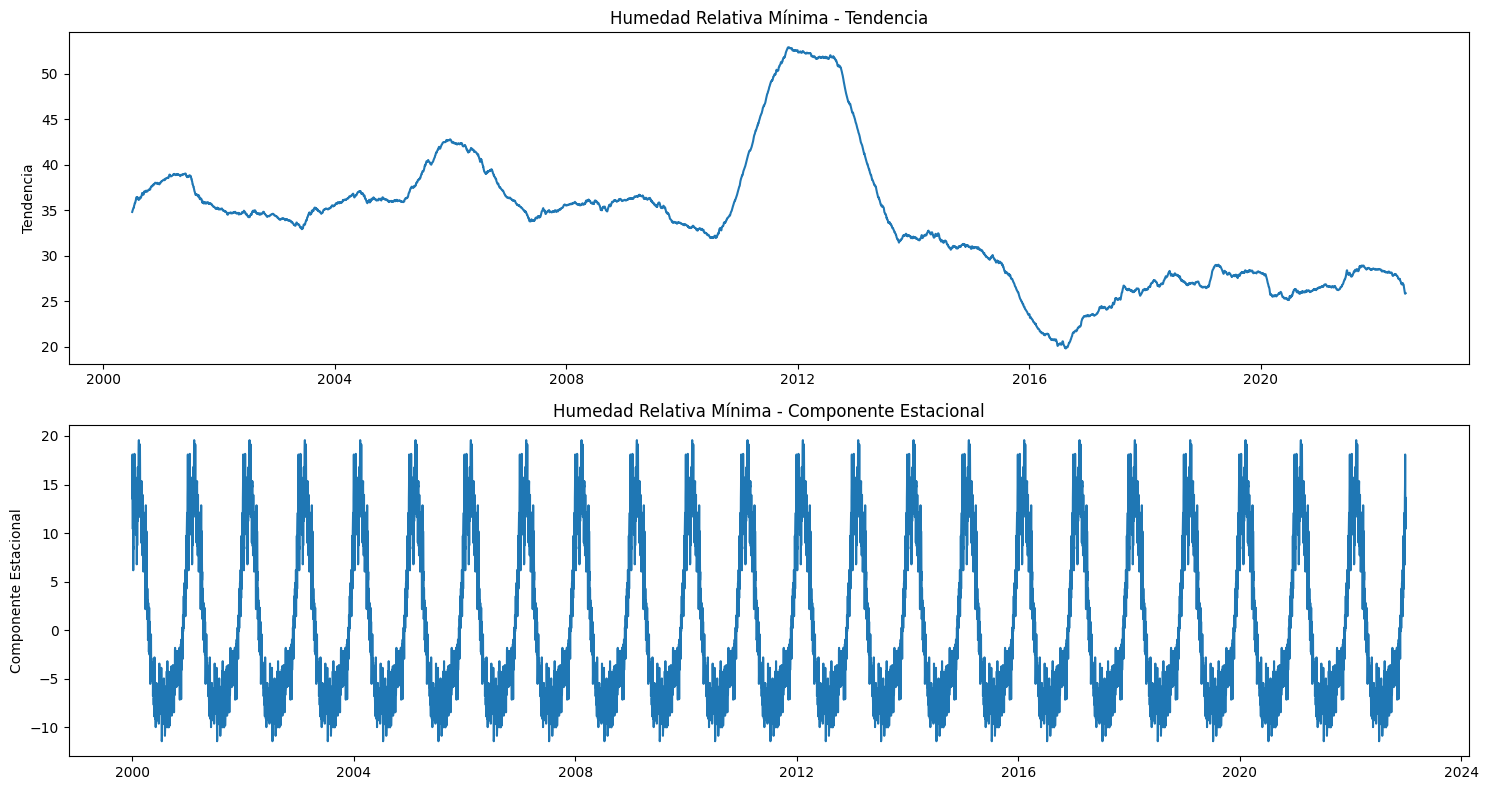

In [31]:
res = sm.tsa.seasonal_decompose(df['Humedad_Relativa_Minima'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Humedad Relativa Mínima - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Humedad Relativa Mínima - Componente Estacional')

plt.tight_layout()
plt.show()

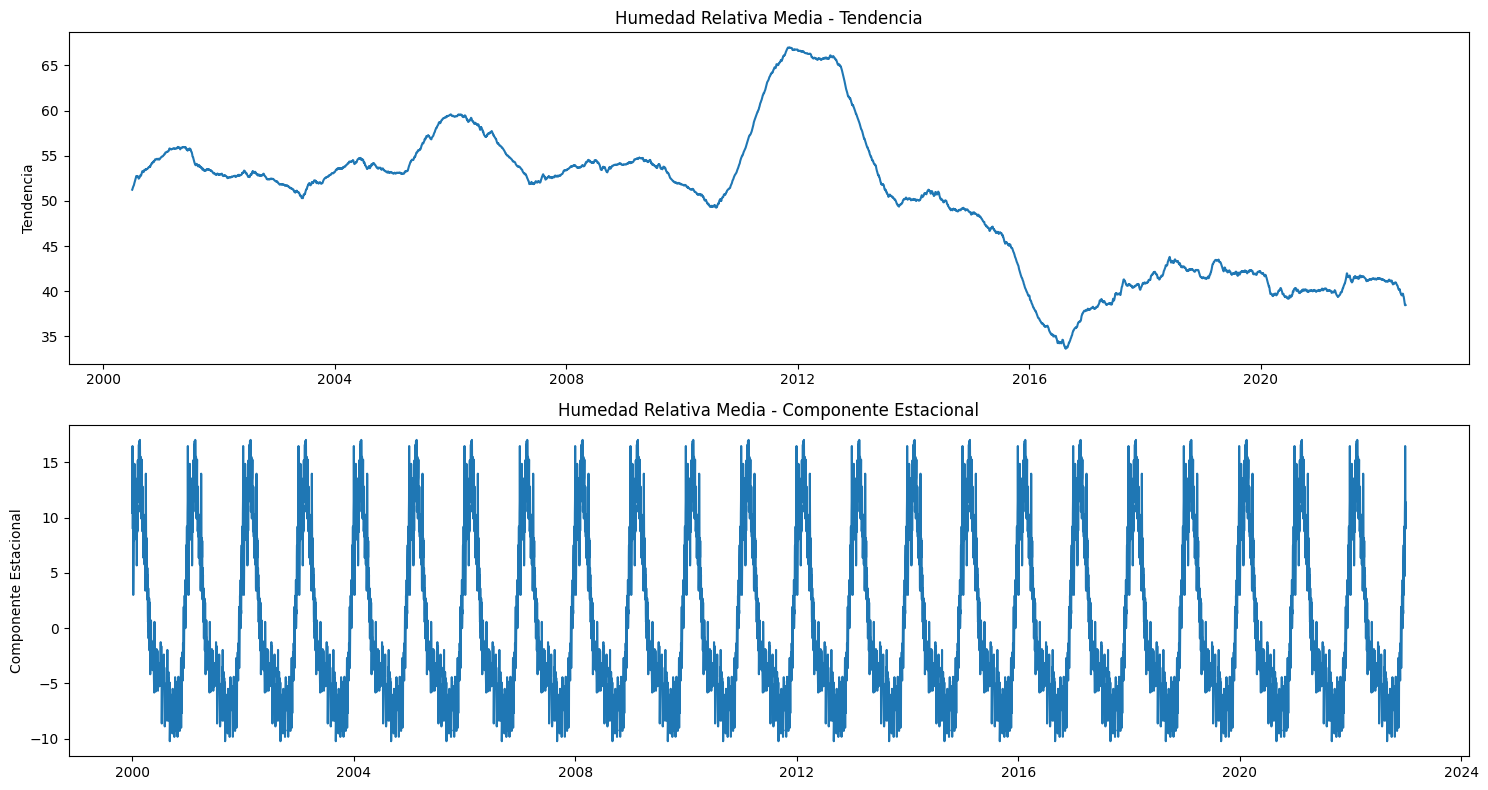

In [32]:
res = sm.tsa.seasonal_decompose(df['Humedad_Relativa_Media'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Humedad Relativa Media - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Humedad Relativa Media - Componente Estacional')

plt.tight_layout()
plt.show()

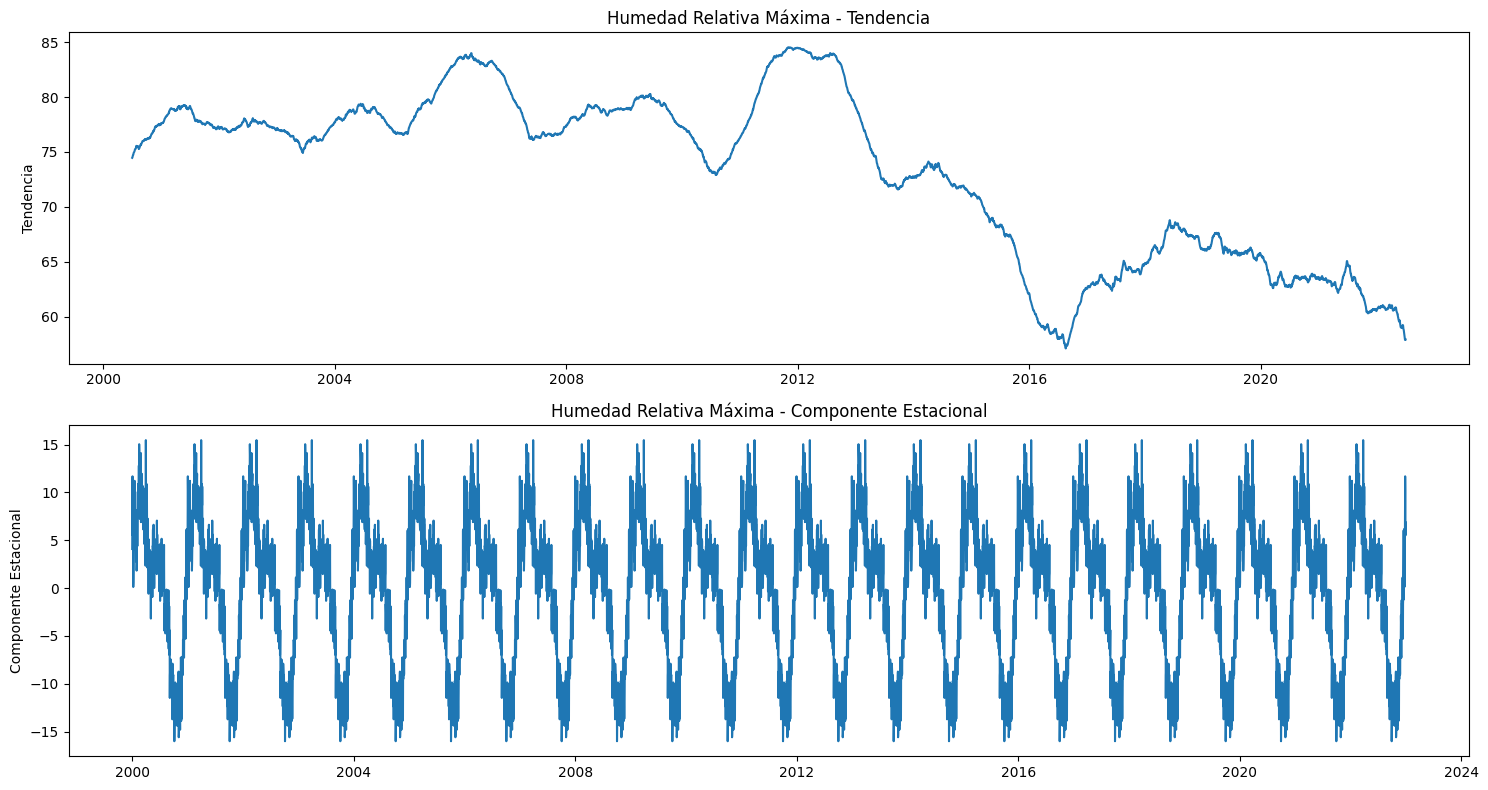

In [33]:
res = sm.tsa.seasonal_decompose(df['Humedad_Relativa_Maxima'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Humedad Relativa Máxima - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Humedad Relativa Máxima - Componente Estacional')

plt.tight_layout()
plt.show()

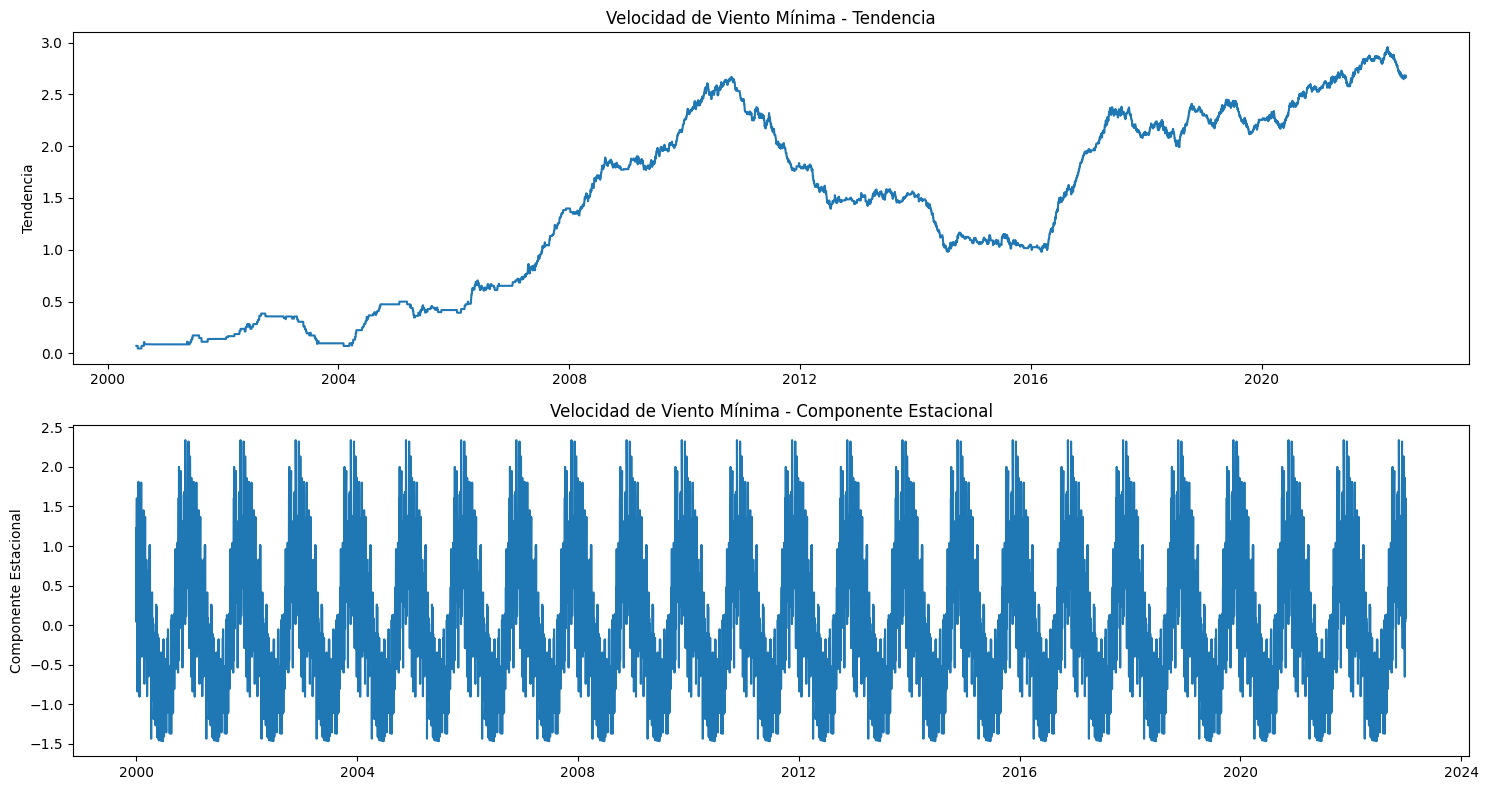

In [34]:
res = sm.tsa.seasonal_decompose(df['Velocidad_de_Viento_Minima'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Velocidad de Viento Mínima - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Velocidad de Viento Mínima - Componente Estacional')

plt.tight_layout()
plt.show()

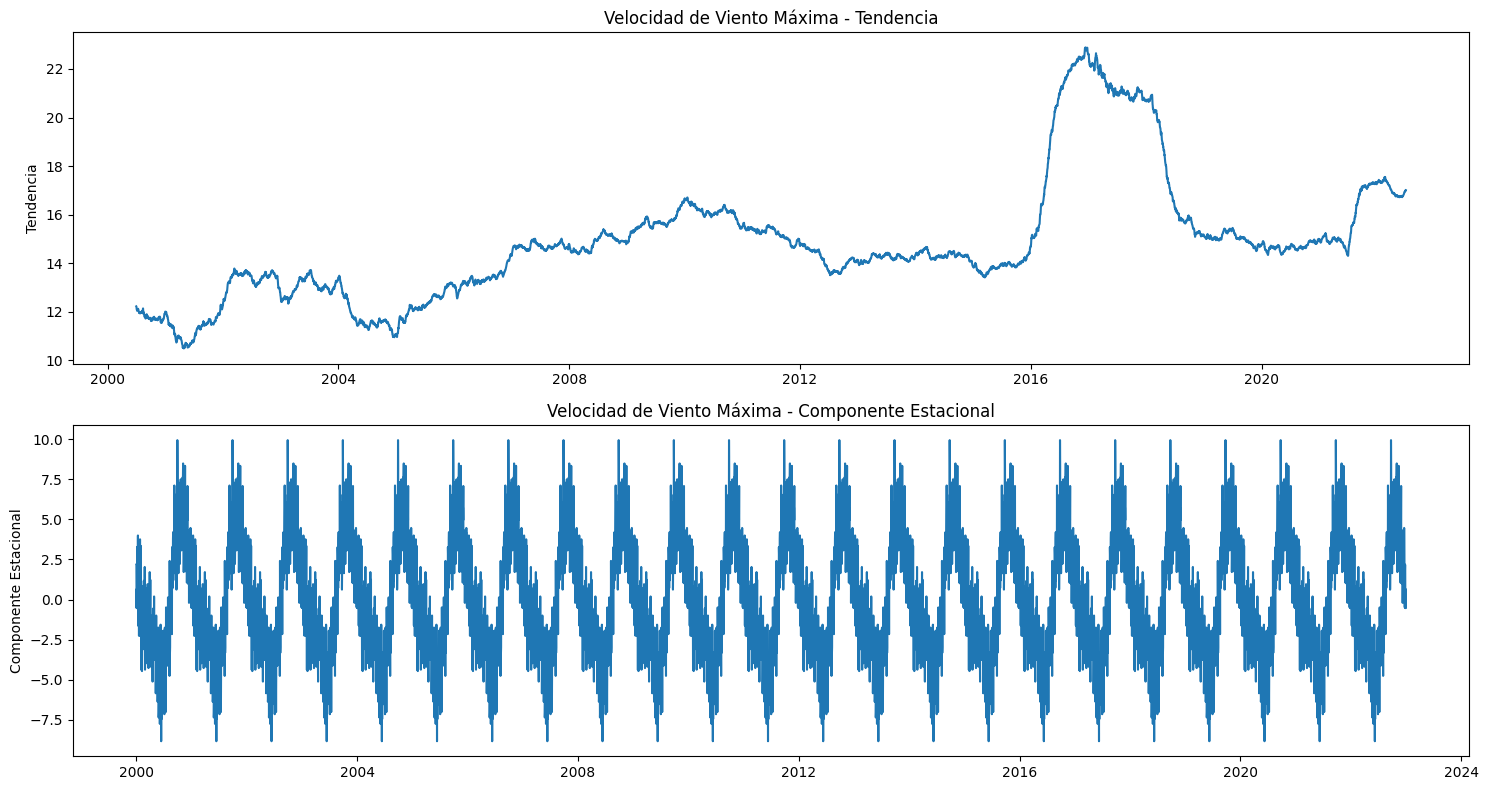

In [35]:
res = sm.tsa.seasonal_decompose(df['Velocidad_de_Viento_Maxima'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Velocidad de Viento Máxima - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Velocidad de Viento Máxima - Componente Estacional')

plt.tight_layout()
plt.show()

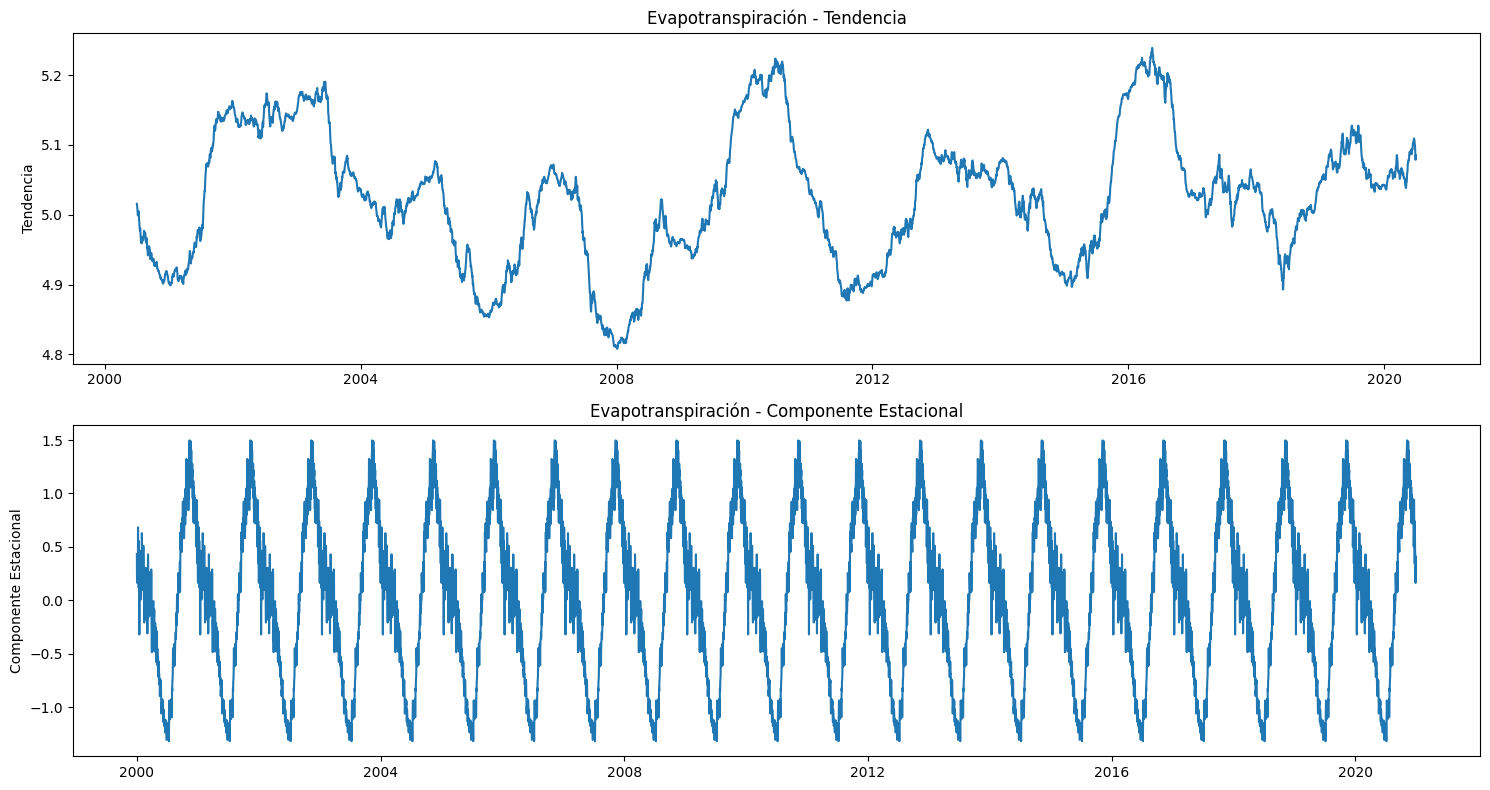

In [39]:
df_filt = df[:'2020-12-31']

res = sm.tsa.seasonal_decompose(df_filt['eTo'], period=365)

fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Mostrar la tendencia con título
axes[0].plot(res.trend)
axes[0].set_ylabel('Tendencia')
axes[0].set_title('Evapotranspiración - Tendencia')

# Mostrar la componente estacional con título
axes[1].plot(res.seasonal)
axes[1].set_ylabel('Componente Estacional')
axes[1].set_title('Evapotranspiración - Componente Estacional')

plt.tight_layout()
plt.show()